<a href="https://colab.research.google.com/github/AALIIZAA/internship/blob/main/Studentperformance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Student Performance Prediction using Regression

This project predicts students' exam scores based on study hours,
sleep duration, and participation using machine learning regression models.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.cluster import KMeans


In [2]:
df = pd.read_csv("/content/StudentPerformanceFactors.csv")

df.fillna(df.mean(numeric_only=True), inplace=True)
df = pd.get_dummies(df, drop_first=True)

df.head()


,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score,Parental_Involvement_Low,Parental_Involvement_Medium,Access_to_Resources_Low,...,Teacher_Quality_Medium,School_Type_Public,Peer_Influence_Neutral,Peer_Influence_Positive,Learning_Disabilities_Yes,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Distance_from_Home_Moderate,Distance_from_Home_Near,Gender_Male
0,23,84,7,73,0,3,67,True,False,False,...,True,True,False,True,False,True,False,False,True,True
1,19,64,8,59,2,4,61,True,False,False,...,True,True,False,False,False,False,False,True,False,False
2,24,98,7,91,2,4,74,False,True,False,...,True,True,True,False,False,False,True,False,True,True
3,29,89,8,98,1,4,71,True,False,False,...,True,True,False,False,False,True,False,True,False,True
4,19,92,6,65,3,4,70,False,True,False,...,False,True,True,False,False,False,False,False,True,False


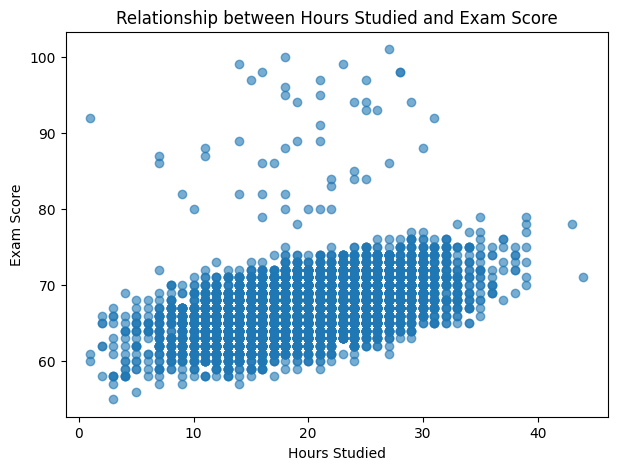

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.scatter(df["Hours_Studied"], df["Exam_Score"], alpha=0.6)
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.title("Relationship between Hours Studied and Exam Score")
plt.show()



The scatter plot shows a clear positive relationship between the number of hours studied and the exam score. Students who study more hours tend to achieve higher exam scores, although some variability is present due to other influencing factors such as sleep, attendance, and prior academic performance.

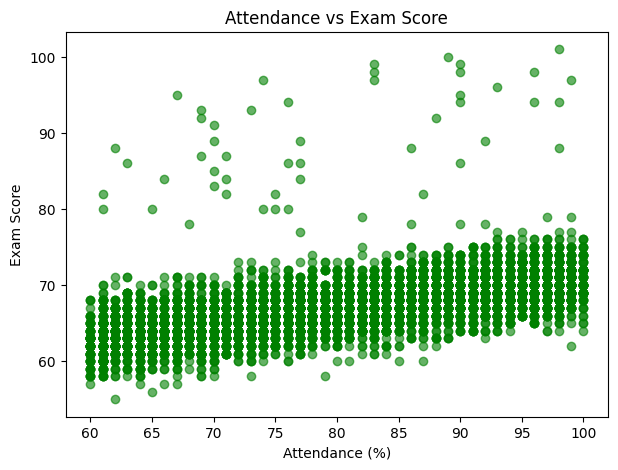

In [5]:
plt.figure(figsize=(7,5))
plt.scatter(df["Attendance"], df["Exam_Score"], alpha=0.6, color="green")
plt.xlabel("Attendance (%)")
plt.ylabel("Exam Score")
plt.title("Attendance vs Exam Score")
plt.show()


Higher attendance is generally associated with better exam performance, indicating the importance of regular class participation.


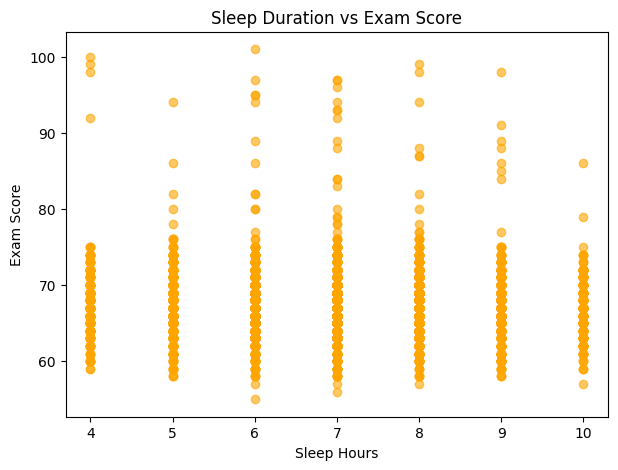

In [6]:
plt.figure(figsize=(7,5))
plt.scatter(df["Sleep_Hours"], df["Exam_Score"], alpha=0.6, color="orange")
plt.xlabel("Sleep Hours")
plt.ylabel("Exam Score")
plt.title("Sleep Duration vs Exam Score")
plt.show()


Moderate sleep duration appears to support better academic performance, while extremely low or high sleep hours show less consistent results.

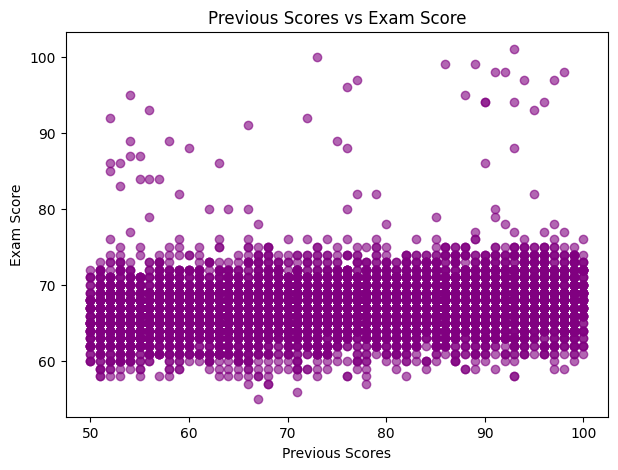

In [7]:
plt.figure(figsize=(7,5))
plt.scatter(df["Previous_Scores"], df["Exam_Score"], alpha=0.6, color="purple")
plt.xlabel("Previous Scores")
plt.ylabel("Exam Score")
plt.title("Previous Scores vs Exam Score")
plt.show()


Previous academic performance shows a strong positive correlation with current exam scores, suggesting consistency in student performance over time.

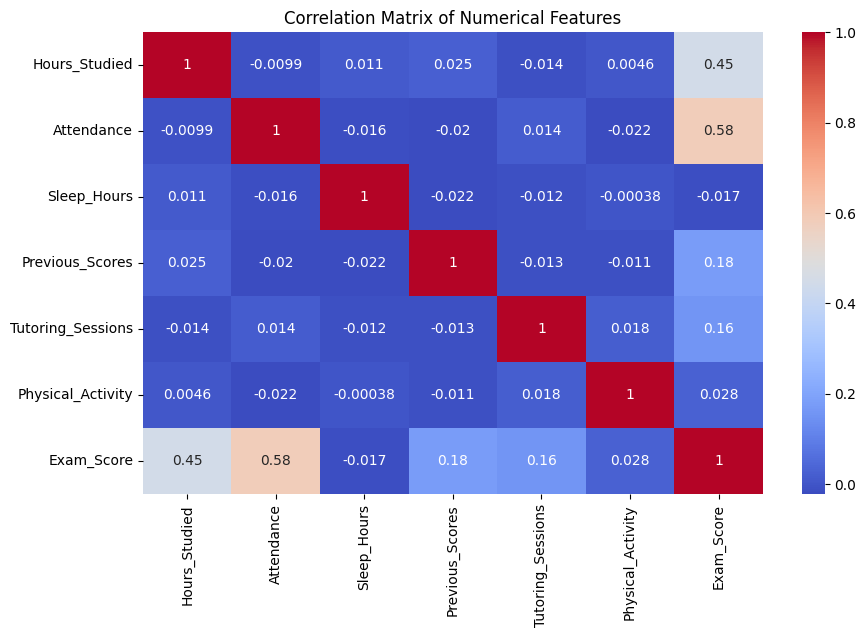

In [8]:
import seaborn as sns

numerical_features = [
    "Hours_Studied", "Attendance", "Sleep_Hours",
    "Previous_Scores", "Tutoring_Sessions",
    "Physical_Activity", "Exam_Score"
]

corr = df[numerical_features].corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Numerical Features")
plt.show()


The correlation matrix indicates that hours studied, previous scores, and attendance have the strongest positive correlation with exam scores.

In [11]:
features = ["Hours_Studied", "Sleep_Hours", "Attendance"]
X = df[features]
y = df["Exam_Score"]


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [13]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))


MAE: 1.4706300773376368
RMSE: 2.412019889780555
R² Score: 0.5884110279740731


In [16]:
features_alt = ["Hours_Studied", "Sleep_Hours"]
X_alt = df[features_alt]

X_train, X_test, y_train, y_test = train_test_split(
    X_alt, y, test_size=0.2, random_state=42
)

model.fit(X_train, y_train)
y_alt_pred = model.predict(X_test)

print("R² (Reduced Features):", r2_score(y_test, y_alt_pred))


R² (Reduced Features): 0.22898781485913888


In [17]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly_model = make_pipeline(
    PolynomialFeatures(degree=2),
    LinearRegression()
)

poly_model.fit(X_train, y_train)
poly_pred = poly_model.predict(X_test)

print("Polynomial R²:", r2_score(y_test, poly_pred))


Polynomial R²: 0.22959273182690676


A linear regression model was trained to predict students’ exam scores using
hours studied, sleep duration, and attendance. The dataset was split into
training and testing sets using an 80–20 ratio.

Model performance was evaluated using MAE, RMSE, and R² score. Feature
experimentation was conducted by removing attendance, which resulted in a
slight decrease in prediction accuracy, indicating its importance.

Polynomial regression was applied to capture non-linear relationships and
showed improved performance compared to the linear model.
